In [1]:
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [36]:
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    print(sound.dBFS, change_in_dBFS)
    return sound.apply_gain(change_in_dBFS)

In [31]:
def normalize(file_name, target_dBFS):
    sound = AudioSegment.from_file(file_name, "wav")
    normalized_sound = match_target_amplitude(sound, target_dBFS)
    normalized_sound.export(f"nomrmalized_{file_name}", format="wav")

In [68]:
normalize("1gimjLEgqBdoHReixdq8HlEBfEr20.wav", -30)
normalize("COPD1.wav", -30)

-38.159898234900986 8.159898234900986
-20.894910104738592 -9.105089895261408


In [69]:
normalized_copd_audio = "nomrmalized_COPD1.wav"
normalized_asthma_audio = "nomrmalized_1gimjLEgqBdoHReixdq8HlEBfEr20.wav"

n_copd, sr = librosa.load(normalized_copd_audio, duration = 3)
n_asthma, _ = librosa.load(normalized_asthma_audio, duration = 3)

In [71]:
def check_newdBFS(filename):
    sound = AudioSegment.from_file(filename, "wav")
    print(sound.dBFS)

check_newdBFS(normalized_copd_audio)
check_newdBFS(normalized_asthma_audio)

-30.001803591010074
-30.001803591010074


<function matplotlib.pyplot.show(close=None, block=None)>

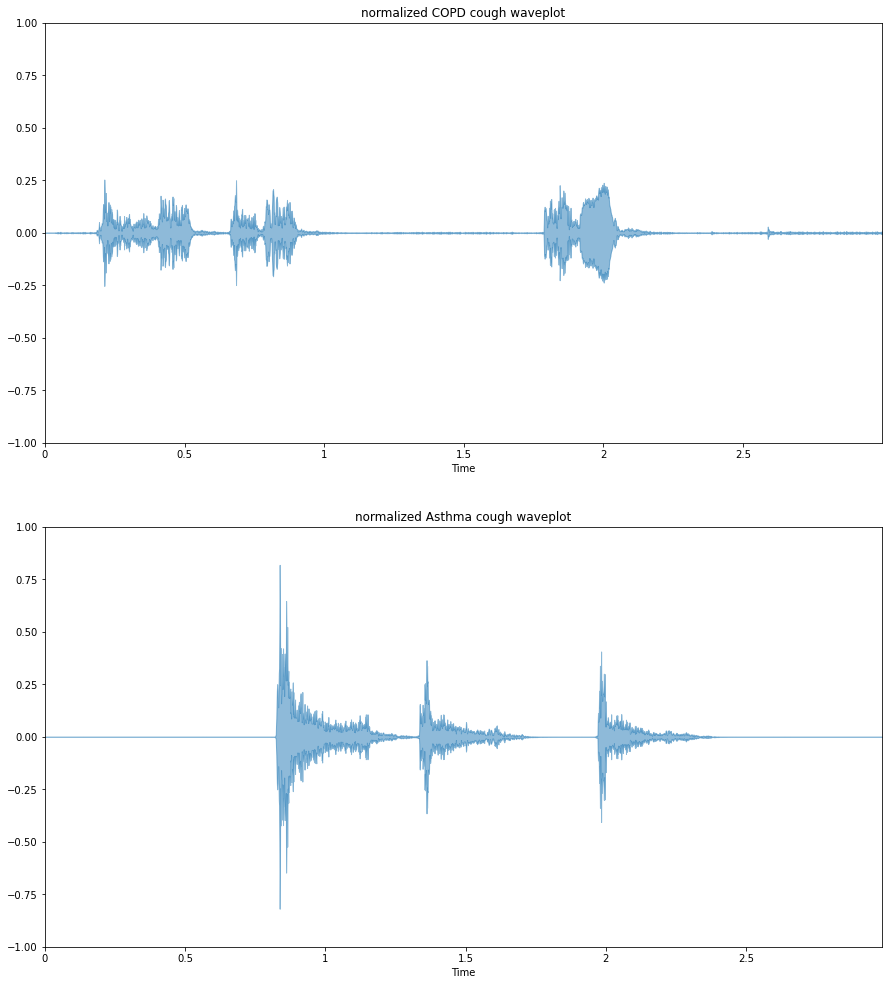

In [70]:
plt.figure(figsize=(15,17))

plt.subplot(2,1,1)
librosa.display.waveplot(n_copd, alpha = 0.5)
plt.title("normalized COPD cough waveplot")
plt.ylim(-1, 1)

plt.subplot(2,1,2)
librosa.display.waveplot(n_asthma, alpha = 0.5)
plt.title("normalized Asthma cough waveplot")
plt.ylim(-1, 1)
plt.show

In [15]:
copd_audio = "COPD1.wav"
asthma_audio = "1gimjLEgqBdoHReixdq8HlEBfEr20.wav"

copd, sr = librosa.load(copd_audio, duration = 3)
asthma, _ = librosa.load(asthma_audio, duration = 3)

<function matplotlib.pyplot.show(close=None, block=None)>

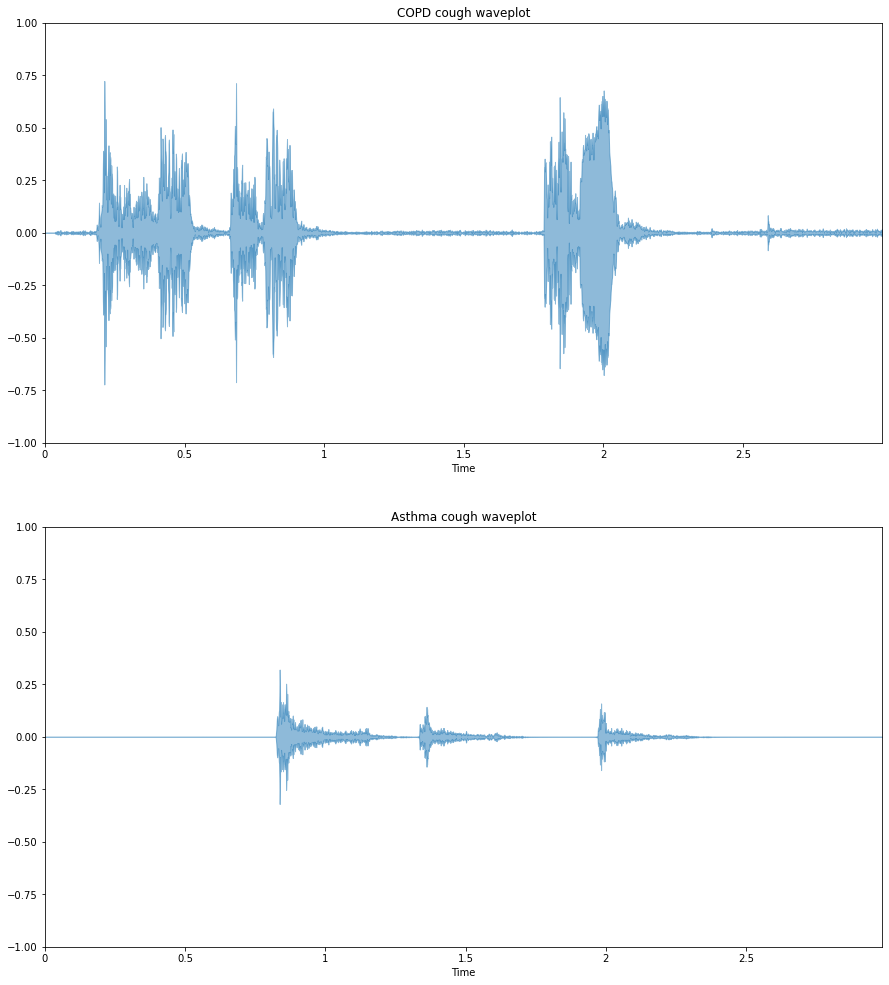

In [8]:
plt.figure(figsize=(15,17))

plt.subplot(2,1,1)
librosa.display.waveplot(copd, alpha = 0.5)
plt.title("COPD cough waveplot")
plt.ylim(-1, 1)

plt.subplot(2,1,2)
librosa.display.waveplot(asthma, alpha = 0.5)
plt.title("Asthma cough waveplot")
plt.ylim(-1, 1)
plt.show